# Ex 3: Descriptive Statistics - Iris

### Cho dữ liệu Iris.xls
1. Đọc dữ liệu vào biến data
2. Xem thông tin data: info, describe, head
3. Tính chiều cao trung bình của petallength, loại hoa Iris versicolor
4. Tạo array phần trăm percentiles chứa các phần trăm thứ 2.5, 25, 50, 75, 97.5. Tính percentiles của petal lengths từ các mẫu Iris versicolor.
5. Vẽ percentiles với marker='D', color='red', x và y tương ứng là ptiles_vers và percentiles/100
6. Tạo array differences: là khoảng khác biệt giữa petallength với mean petallength. Tính bình phương differences. Tính mean square difference và đặt tên là variance_explicit. 
7. Tính variance trên bằng cách sử dung np.var. So sánh kết quà
8. Tính căn bậc hai của variance ở câu trên
9. Tính độ lệch chuẩn của petallength
10. Hãy vẽ biểu đồ thể hiện mối quan hệ của versicolor_petal_length, versicolor_petal_width
11. Tìm covariance matrix của versicolor_petal_length, versicolor_petal_width. Trích xuất covariance của petallength và petalwidth từ covariance matrix và đặt tên là petal_cov
12. Tìm correlation matrix của versicolor_petal_length, versicolor_petal_width. Trích xuất correlation của petallength và petalwidth từ correlation matrix và đặt tên là petal_corr
13. Vẽ boxplot của pentallength cho toàn bộ data và vẽ boxplot của pentallength theo loại
14. Dựa trên boxplot trên, hãy cho biết các loại có outlier không? Nếu có thì dùng z-score để tính và xác định các index của outlier theo từng loại (những index nào? giá trị outliers tương ứng cho những index đó?)
15. Cho biểu đồ sau:

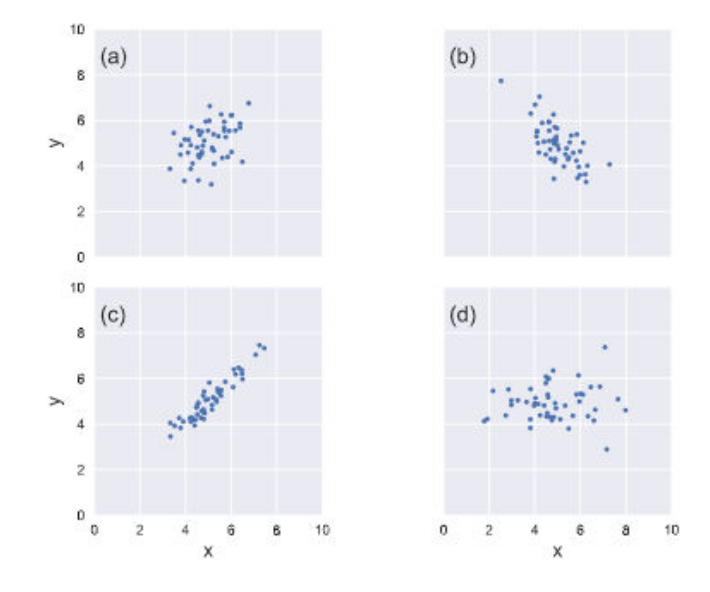

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img = np.array(Image. open('map1.jpg'))
plt.figure(figsize=(12,12))
plt. imshow(img, interpolation='bilinear' )
plt. axis('off' )
plt. show()

- Biểu đồ nào có:
    - variance cao nhất trên x,
    - covariance cao nhất
    - negative covariance
***

## Gợi ý

In [2]:
import pandas as pd
from scipy import stats
import numpy as np

In [3]:
data = pd.read_excel("Iris.xls")
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Compute the mean petal length of Iris versicolor

In [5]:
pental_lenghth_Iris_versicolor = data[data.iris == "Iris-versicolor"]['petallength']

In [6]:
mean_pental_lenghth = pental_lenghth_Iris_versicolor.mean()
mean_pental_lenghth

4.26

In [7]:
# Percentiles, and box plots

In [8]:
# percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

In [9]:
# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(pental_lenghth_Iris_versicolor, percentiles)
ptiles_vers

array([3.3   , 4.    , 4.35  , 4.6   , 4.9775])

In [10]:
import matplotlib.pyplot as plt

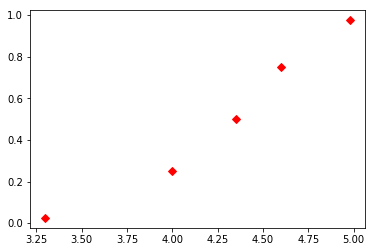

In [11]:
# Plot percentiles as red x's
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')
plt.show()

In [12]:
# Variance and standard deviation

In [13]:
# Array of differences to mean: differences
differences = pental_lenghth_Iris_versicolor - mean_pental_lenghth
differences[0:10]

50    0.44
51    0.24
52    0.64
53   -0.26
54    0.34
55    0.24
56    0.44
57   -0.96
58    0.34
59   -0.36
Name: petallength, dtype: float64

In [14]:
# Square the differences: diff_sq
diff_sq = differences**2
diff_sq[0:10]

50    0.1936
51    0.0576
52    0.4096
53    0.0676
54    0.1156
55    0.0576
56    0.1936
57    0.9216
58    0.1156
59    0.1296
Name: petallength, dtype: float64

In [15]:
# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)
variance_explicit

0.21640000000000012

In [16]:
# Compute the variance using NumPy: variance_np
variance_np = np.var(pental_lenghth_Iris_versicolor)
variance_np

0.21640000000000012

In [17]:
# Print the results
print(variance_explicit, variance_np)

0.21640000000000012 0.21640000000000012


In [18]:
# Compute the variance: variance
variance = np.var(pental_lenghth_Iris_versicolor)
# Print the square root of the variance
print(np.sqrt(variance))

0.4651881339845204


In [19]:
# Print the standard deviation
print(np.std(pental_lenghth_Iris_versicolor))

0.4651881339845204


In [20]:
pental_width_Iris_versicolor = data[data.iris == "Iris-versicolor"]['petalwidth']

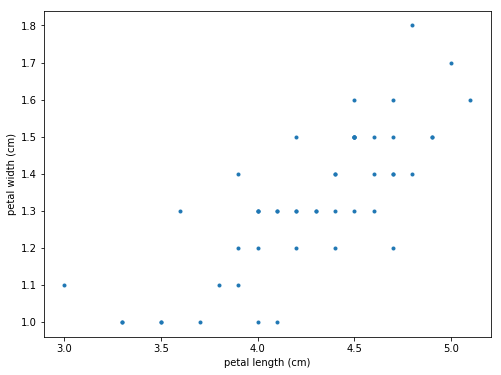

In [21]:
# Make a scatter plot
plt.figure(figsize=(8, 6))
plt.plot(pental_lenghth_Iris_versicolor, pental_width_Iris_versicolor,
             marker='.', linestyle='none')
# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# Show the result
plt.show()


In [22]:
# covariance matrix

In [23]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(pental_lenghth_Iris_versicolor, pental_width_Iris_versicolor)
# Print covariance matrix
print(covariance_matrix)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]


In [24]:
# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]
# Print the length/width covariance
print(petal_cov)

0.07310204081632653


In [25]:
# Compute correlation matrix: corr_mat
corr_matrix = np.corrcoef(pental_lenghth_Iris_versicolor, pental_width_Iris_versicolor)
corr_matrix

array([[1.        , 0.78666809],
       [0.78666809, 1.        ]])

In [26]:
# Extract correlation of length and width of petals: petal_corr
petal_corr = corr_matrix[0,1]
# Print the length/width correlation
print(petal_corr)

0.7866680885228169


In [27]:
# box plot

In [28]:
import seaborn as sns

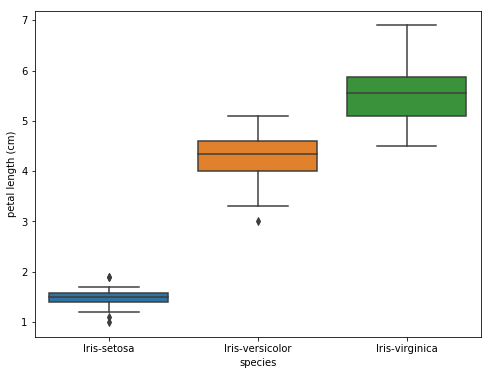

In [29]:
# Create box plot with Seaborn's default settings
plt.figure(figsize=(8,6))
sns.boxplot(x='iris', y='petallength', data=data)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

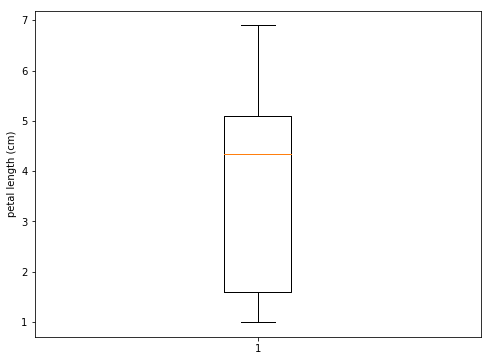

In [30]:
# Create box plot with Seaborn's default settings
plt.figure(figsize=(8,6))
plt.boxplot(data.petallength)
# Label the axes
plt.ylabel('petal length (cm)')
# Show the plot
plt.show()

In [31]:
# Nhận xét: Iris-virginica không có outliers
# Iris-setosa và Iris-versicolor có outlier

In [32]:
# Ouliers of Iris-setosa
pental_lenght_Iris_setosa = data[data.iris == "Iris-setosa"]['petallength']
pental_lenght_Iris_setosa[0:5]

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petallength, dtype: float64

In [33]:
number_z_score_setosa = stats.zscore(pental_lenght_Iris_setosa)
number_z_score_setosa

array([-0.37259715, -0.37259715, -0.95478019,  0.20958589, -0.37259715,
        1.37395198, -0.37259715,  0.20958589, -0.37259715,  0.20958589,
        0.20958589,  0.79176894, -0.37259715, -2.11914627, -1.53696323,
        0.20958589, -0.95478019, -0.37259715,  1.37395198,  0.20958589,
        1.37395198,  0.20958589, -2.70132931,  1.37395198,  2.53831806,
        0.79176894,  0.79176894,  0.20958589, -0.37259715,  0.79176894,
        0.79176894,  0.20958589,  0.20958589, -0.37259715,  0.20958589,
       -1.53696323, -0.95478019,  0.20958589, -0.95478019,  0.20958589,
       -0.95478019, -0.95478019, -0.95478019,  0.79176894,  2.53831806,
       -0.37259715,  0.79176894, -0.37259715,  0.20958589, -0.37259715])

In [43]:
pental_lenght_Iris_setosa.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

In [48]:
# vì index của nhóm này là từ 0 nên không cần tình lại index
outliers_setosa = number_z_score_setosa[[(n <=-2.5)|(n>=2.5) for n in number_z_score_setosa]]
indexes_setosa = [number_z_score_setosa.tolist().index(i) for i in outliers_setosa]
print("Indexes:", indexes_setosa)
print("Outliers:\n", pental_lenght_Iris_setosa[indexes_setosa])

Indexes: [22, 24, 24]
Outliers:
 22    1.0
24    1.9
24    1.9
Name: petallength, dtype: float64


In [35]:
# Ouliers of Iris-versicolor
number_z_score_versicolor = stats.zscore(pental_lenghth_Iris_versicolor)
number_z_score_versicolor

array([ 0.94585388,  0.5159203 ,  1.37578746, -0.55891365,  0.73088709,
        0.5159203 ,  0.94585388, -2.06368119,  0.73088709, -0.77388044,
       -1.63374761, -0.12898007, -0.55891365,  0.94585388, -1.41878082,
        0.30095351,  0.5159203 , -0.34394686,  0.5159203 , -0.77388044,
        1.16082067, -0.55891365,  1.37578746,  0.94585388,  0.08598672,
        0.30095351,  1.16082067,  1.59075425,  0.5159203 , -1.63374761,
       -0.98884723, -1.20381403, -0.77388044,  1.80572104,  0.5159203 ,
        0.5159203 ,  0.94585388,  0.30095351, -0.34394686, -0.55891365,
        0.30095351,  0.73088709, -0.55891365, -2.06368119, -0.12898007,
       -0.12898007, -0.12898007,  0.08598672, -2.70858156, -0.34394686])

In [42]:
pental_lenghth_Iris_versicolor.index

Int64Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
            67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
            84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

In [47]:
# vì index của nhóm này là từ 50 nên +50 để biết index chính xác
outliers_versicolor = number_z_score_versicolor[[(n <=-2.5)|(n>=2.5) for n in number_z_score_versicolor]]
indexes_versicolor = [number_z_score_versicolor.tolist().index(i) for i in outliers_versicolor]
indexes_versicolor = [ value + 50 for value in indexes_versicolor]
print("Indexes:", indexes_versicolor)
print("Outliers:\n", pental_lenghth_Iris_versicolor[indexes_versicolor])

Indexes: [98]
Outliers:
 98    3.0
Name: petallength, dtype: float64


In [37]:
## 15. d, c, b